In [1]:
# Si es que se ejecuta desde Google Colab + Google Drive
from google.colab import drive
drive.mount('/gdrive/')
ruta = "/gdrive/MyDrive/Ramos 10 Semestre/INF395 - Introducción a las Redes Neuronales And Deep Learning/Tareas/Tarea 2/Kaggle/"

# Si es que se ejecuta local (cambiar ruta al deseado)
# ruta = ""

Mounted at /gdrive/


In [2]:
!pip install -q keras-core

!pip install scikeras

!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 15.3 MB/s eta 0:00:00


In [3]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow" # 'torch', 'tensorflow', 'jax'
#import keras_core as keras
import tensorflow.keras as keras

In [4]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.initializers import he_normal
from keras import optimizers
from keras.callbacks import LearningRateScheduler, TensorBoard
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import get_file
from keras import backend as K
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import pickle
import matplotlib.pyplot as plt

SEED = 42

### Separación Conjuntos

In [5]:
df = pd.read_csv(ruta+'train.csv')
kaggle_predict_df = pd.read_csv(ruta+'test.csv')

In [6]:
train_data, temporal_data = train_test_split(df, test_size = 0.2, train_size = 0.8, random_state = SEED)
test_data, valid_data = train_test_split(temporal_data, test_size = 0.5, train_size = 0.5, random_state = SEED)

In [7]:
len_train_data = len(train_data)
len_test_data = len(test_data)
len_valid_data = len(valid_data)

len_train_data + len_test_data + len_valid_data == len(df)

True

### Pre-Procesamiento X

In [29]:
img_rows, img_cols = 32, 32

base_img = image = np.zeros((32, 32, 3), dtype=np.uint8)

In [ ]:
X_train = []

for _, row in tqdm_notebook(train_data.iterrows(), total=len_train_data, desc="Procesando imágenes"):
  row_v = row.values

  try:
    # cargamos la imagen
    image = keras.utils.load_img(f"{ruta}{row_v[0]}")

    # reescalamos la imagen
    image = image.resize((img_rows, img_cols))

    # convertimos la imagen a un array y la almacenamos en la lista
    X_train.append(keras.utils.img_to_array(image))
  except Exception as e:
    print(f"Error en imagen {row_v[0]}")
    print(e)
    print("Adding base image to array\n")
    X_train.append(base_img)

<ipython-input-16-3dbf1e47d9ff>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _, row in tqdm_notebook(train_data.iterrows(), total=len_train_data, desc="Procesando imágenes"):


Procesando imágenes:   0%|          | 0/60600 [00:00<?, ?it/s]

Se han truncado las últimas 5000 líneas del flujo de salida.
Error en imagen images/bibimbap/2009723.jpg
[Errno 2] No such file or directory: '/gdrive/MyDrive/Ramos 10 Semestre/INF395 - Introducción a las Redes Neuronales And Deep Learning/Tareas/Tarea 2/Kaggle//images/bibimbap/2009723.jpg'
Adding base image to array

Error en imagen images/pizza/1228171.jpg
[Errno 2] No such file or directory: '/gdrive/MyDrive/Ramos 10 Semestre/INF395 - Introducción a las Redes Neuronales And Deep Learning/Tareas/Tarea 2/Kaggle//images/pizza/1228171.jpg'
Adding base image to array

Error en imagen images/oysters/3665530.jpg
[Errno 2] No such file or directory: '/gdrive/MyDrive/Ramos 10 Semestre/INF395 - Introducción a las Redes Neuronales And Deep Learning/Tareas/Tarea 2/Kaggle//images/oysters/3665530.jpg'
Adding base image to array

Error en imagen images/sashimi/3619696.jpg
[Errno 2] No such file or directory: '/gdrive/MyDrive/Ramos 10 Semestre/INF395 - Introducción a las Redes Neuronales And De

In [ ]:
train_file_path = f"{ruta}X_train.pkl"

with open(train_file_path, 'wb') as file:
    pickle.dump(X_train, file)

In [ ]:
X_test = []

for _, row in tqdm_notebook(test_data.iterrows(), total=len_test_data, desc="Procesando imágenes"):
  row_v = row.values

  try:
    # cargamos la imagen
    image = keras.utils.load_img(f"{ruta}{row_v[0]}")

    # reescalamos la imagen
    image = image.resize((img_rows, img_cols))

    # convertimos la imagen a un array y la almacenamos en la lista
    X_test.append(keras.utils.img_to_array(image))
  except Exception as e:
    print(f"Error en imagen {row_v[0]}")
    print(e)
    print("Adding base image to array\n")
    X_test.append(base_img)

<ipython-input-18-06ce61ebd506>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _, row in tqdm_notebook(test_data.iterrows(), total=len_test_data, desc="Procesando imágenes"):


Procesando imágenes:   0%|          | 0/7575 [00:00<?, ?it/s]

Error en imagen images/baklava/2347717.jpg
cannot identify image file <_io.BytesIO object at 0x787942c22a20>
Adding base image to array



In [ ]:
test_file_path = f"{ruta}X_test.pkl"

with open(test_file_path, 'wb') as file:
    pickle.dump(X_test, file)

In [ ]:
X_valid = []

for _, row in tqdm_notebook(valid_data.iterrows(), total=len_valid_data, desc="Procesando imágenes"):
  row_v = row.values

  try:
    # cargamos la imagen
    image = keras.utils.load_img(f"{ruta}/{row_v[0]}")

    # reescalamos la imagen
    image = image.resize((img_rows, img_cols))

    # convertimos la imagen a un array y la almacenamos en la lista
    X_valid.append(keras.utils.img_to_array(image))
  except Exception as e:
    print(f"Error en imagen {row_v[0]}")
    print(e)
    print("Adding base image to array\n")
    X_valid.append(base_img)

<ipython-input-20-f8f35341fa2c>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _, row in tqdm_notebook(valid_data.iterrows(), total=len_valid_data, desc="Procesando imágenes"):


Procesando imágenes:   0%|          | 0/7575 [00:00<?, ?it/s]

In [ ]:
valid_file_path = f"{ruta}X_valid.pkl"

with open(valid_file_path, 'wb') as file:
    pickle.dump(X_valid, file)

In [9]:
with open(f"{ruta}X_train.pkl", 'rb') as f:
    X_train = pickle.load(f)

with open(f"{ruta}X_test.pkl", 'rb') as f:
    X_test = pickle.load(f)

with open(f"{ruta}X_valid.pkl", 'rb') as f:
    X_valid = pickle.load(f)

In [10]:
X_train[0].shape

(32, 32, 3)

In [11]:
X_train[0]

array([[[213., 206., 200.],
        [215., 207., 202.],
        [216., 208., 202.],
        ...,
        [221., 216., 217.],
        [224., 218., 221.],
        [169., 164., 169.]],

       [[214., 208., 201.],
        [214., 207., 201.],
        [215., 208., 202.],
        ...,
        [220., 214., 216.],
        [221., 216., 218.],
        [226., 220., 222.]],

       [[214., 207., 202.],
        [215., 208., 202.],
        [215., 209., 203.],
        ...,
        [221., 215., 217.],
        [221., 215., 216.],
        [221., 216., 218.]],

       ...,

       [[224., 217., 213.],
        [219., 211., 209.],
        [220., 211., 206.],
        ...,
        [206., 196., 193.],
        [205., 200., 202.],
        [200., 198., 204.]],

       [[222., 215., 208.],
        [220., 212., 209.],
        [216., 209., 205.],
        ...,
        [209., 202., 201.],
        [206., 202., 207.],
        [199., 197., 204.]],

       [[221., 214., 208.],
        [222., 215., 210.],
        [217., 2

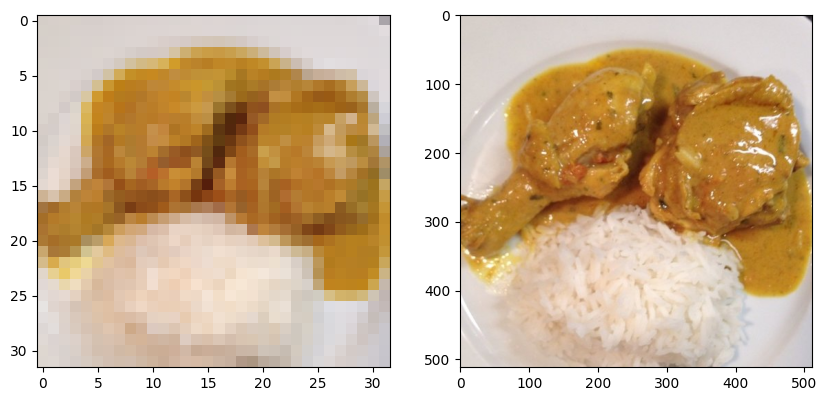

In [12]:
def image_comparer():
  path = list(train_data.iterrows())[0][1]["path"]
  img2 = keras.utils.load_img(f"{ruta}{path}")

  fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5))
  img = np.array(X_train[0]) / 255
  axes[0].imshow(img)
  axes[1].imshow(img2)

image_comparer()

In [13]:
cont = 0
train_indexes = []
for i in range(len(X_train)):
  if np.all(X_train[i] == 0):
      cont += 1
      train_indexes.append(i)
  else:
      continue
      #print("The array contains non-zero elements.")

print(cont)
print(train_indexes)

for i in train_indexes:
  path = train_data.iloc[i]["path"]

  print(path)

0
[]


### Pre-Procesamiento y

In [14]:
c_unique_values = np.array([i for i in range(3)])
c_one_hot_mapping = {value: np.eye(len(c_unique_values))[i].tolist() for i, value in enumerate(c_unique_values)}

y_unique_values = np.array([i for i in range(101)])
y_one_hot_mapping = {value: np.eye(len(y_unique_values))[i].tolist() for i, value in enumerate(y_unique_values)}

In [15]:
y_l1_train = np.array(train_data["food_category"].map(c_one_hot_mapping).tolist())
y_l2_train = np.array(train_data["dish"].map(y_one_hot_mapping).tolist())

y_l1_test = np.array(test_data["food_category"].map(c_one_hot_mapping).tolist())
y_l2_test = np.array(test_data["dish"].map(y_one_hot_mapping).tolist())

y_l1_valid = np.array(valid_data["food_category"].map(c_one_hot_mapping).tolist())
y_l2_valid = np.array(valid_data["dish"].map(y_one_hot_mapping).tolist())

In [16]:
print(train_data.iloc[0])
print(y_l1_train[0])
print(y_l2_train[0])

path             images/chicken_curry/1686854.jpg
food_category                                   2
dish                                           13
classes                                      2 13
Name: 4327, dtype: object
[0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


### Modelo y Entrenamiento

El siguiente modelo y su implementación está fuertemente basado en la implementación de B-CNN presente en el siguiente paper y github:

- https://arxiv.org/abs/1709.09890
- https://github.com/zhuxinqimac/B-CNN

In [17]:
# Callbacks y metrics

def scheduler(epoch):
  learning_rate_init = 0.003
  if epoch > 40:
    learning_rate_init = 0.0005
  if epoch > 50:
    learning_rate_init = 0.0001
  return learning_rate_init

class LossWeightsModifier(keras.callbacks.Callback):
  def __init__(self, alpha, beta, gamma):
    self.alpha = alpha
    self.beta = beta
    self.gamma = gamma
  def on_epoch_end(self, epoch, logs={}):
    if epoch == 8:
      K.set_value(self.alpha, 0.1)
      K.set_value(self.beta, 0.8)
      K.set_value(self.gamma, 0.1)
    if epoch == 18:
      K.set_value(self.alpha, 0.1)
      K.set_value(self.beta, 0.2)
      K.set_value(self.gamma, 0.7)
    if epoch == 28:
      K.set_value(self.alpha, 0)
      K.set_value(self.beta, 0)
      K.set_value(self.gamma, 1)

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [30]:
# Dimensiones

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 3)

In [31]:
# Variables

train_size = len_train_data

num_c_1      = 3 # coarse 1 classes
num_classes  = 101 # fine classes

batch_size   = 128
epochs       = 60

In [20]:
# Preprocesamiento

X_train = np.array(X_train).astype("float32")
X_test = np.array(X_test).astype("float32")
X_valid = np.array(X_valid).astype("float32")

In [21]:
mean_train = np.mean(X_train)
std_train = np.std(X_train)

mean_test = np.mean(X_test)
std_test = np.std(X_test)

mean_valid = np.mean(X_valid)
std_valid = np.std(X_valid)

In [22]:
X_train = (X_train-mean_train) / std_train

In [23]:
X_test = (X_test-mean_test) / std_test

In [24]:
X_valid = (X_valid-mean_valid) / std_valid

In [32]:
# Modelo

alpha = K.variable(value=0.98, dtype="float32", name="alpha")
beta = K.variable(value=0.01, dtype="float32", name="beta")
gamma = K.variable(value=0.01, dtype="float32", name="gamma")

img_input = Input(shape=input_shape, name='input')

#--- block 1 ---
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

#--- block 2 ---
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

#--- coarse 1 branch ---
c_1_bch = Flatten(name='c1_flatten')(x)
c_1_bch = Dense(256, activation='relu', name='c1_fc')(c_1_bch)
c_1_bch = BatchNormalization()(c_1_bch)
c_1_bch = Dropout(0.5)(c_1_bch)
c_1_bch = Dense(256, activation='relu', name='c1_fc2')(c_1_bch)
c_1_bch = BatchNormalization()(c_1_bch)
c_1_bch = Dropout(0.5)(c_1_bch)
c_1_pred = Dense(num_c_1, activation='softmax', name='c1_predictions')(c_1_bch)

#--- block 3 ---
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

#--- block 4 ---
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

#--- fine block ---
x = Flatten(name='flatten')(x)
x = Dense(1024, activation='relu', name='fc')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu', name='fc2')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
fine_pred = Dense(num_classes, activation='softmax', name='fine_pred')(x)

model = Model(img_input, [c_1_pred, fine_pred], name='dishes_pred')

In [33]:
# Entrenamiento

sgd = optimizers.SGD(lr=0.003, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              loss_weights=[alpha, beta, gamma],
              metrics=[get_f1])

change_lr = LearningRateScheduler(scheduler)
change_lw = LossWeightsModifier(alpha, beta, gamma)
cbks = [change_lr, change_lw]

model.fit(X_train, [y_l1_train, y_l2_train],
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=cbks,
          validation_data=(X_valid, [y_l1_valid, y_l2_valid]))

Epoch 1/60
474/474 [==============================] - 44s 49ms/step - loss: 0.8269 - c1_predictions_loss: 0.7805 - fine_pred_loss: 6.1982 - c1_predictions_get_f1: 0.6815 - fine_pred_get_f1: 0.0020 - val_loss: 0.6575 - val_c1_predictions_loss: 0.6218 - val_fine_pred_loss: 4.8122 - val_c1_predictions_get_f1: 0.7470 - val_fine_pred_get_f1: 0.0000e+00 - lr: 0.0030
Epoch 2/60
474/474 [==============================] - 22s 46ms/step - loss: 0.6605 - c1_predictions_loss: 0.6134 - fine_pred_loss: 5.9344 - c1_predictions_get_f1: 0.7494 - fine_pred_get_f1: 0.0063 - val_loss: 0.6276 - val_c1_predictions_loss: 0.5924 - val_fine_pred_loss: 4.7040 - val_c1_predictions_get_f1: 0.7571 - val_fine_pred_get_f1: 0.0128 - lr: 0.0030
Epoch 3/60
474/474 [==============================] - 21s 43ms/step - loss: 0.6348 - c1_predictions_loss: 0.5888 - fine_pred_loss: 5.7681 - c1_predictions_get_f1: 0.7571 - fine_pred_get_f1: 0.0081 - val_loss: 0.6175 - val_c1_predictions_loss: 0.5835 - val_fine_pred_loss: 4.5666

In [53]:
# Evaluación

# model.compile(loss='categorical_crossentropy',
#               optimizer=sgd,
#               loss_weights=[alpha, beta, gamma],
#               metrics=[get_f1])

# model_path = f'{ruta}model1.keras'

score = model.evaluate(X_test, [y_l1_test, y_l2_test], verbose=0)
#model.save(model_path)
print('score is: ', score)

score is:  [0.0, 0.46812760829925537, 3.653980255126953, 0.8046755194664001, 0.2696843147277832]


### Clasificación Test Data Kaggle

In [ ]:
X_test_kaggle = []

for _, row in tqdm_notebook(kaggle_predict_df.iterrows(), total=len(kaggle_predict_df), desc="Procesando imágenes"):
  row_v = row.values

  try:
    # cargamos la imagen
    image = keras.utils.load_img(f"{ruta}{row_v[0]}")

    # reescalamos la imagen
    image = image.resize((img_rows, img_cols))

    # convertimos la imagen a un array y la almacenamos en la lista
    X_test_kaggle.append(keras.utils.img_to_array(image))
  except Exception as e:
    print(f"Error en imagen {row_v[0]}")
    print(e)
    print("Adding base image to array\n")
    X_test_kaggle.append(base_img)

In [ ]:
test_kaggle_file_path = f"{ruta}X_test_kaggle.pkl"

with open(test_kaggle_file_path, 'wb') as file:
    pickle.dump(X_test_kaggle, file)

In [54]:
with open(f"{ruta}X_test_kaggle.pkl", 'rb') as f:
    X_test_kaggle = pickle.load(f)

In [57]:
X_test_kaggle = np.array(X_test_kaggle).astype("float32")

In [58]:
mean_test_kaggle = np.mean(X_test_kaggle)
std_test_kaggle = np.std(X_test_kaggle)

In [59]:
X_test_kaggle = (X_test_kaggle-mean_test_kaggle) / std_test_kaggle

In [68]:
y_pred_kaggle = model.predict(X_test_kaggle)  # Predicted values

790/790 [==============================] - 5s 6ms/step


In [69]:
np.array(y_pred_kaggle[0]).shape

(25250, 3)

In [70]:
np.array(y_pred_kaggle[1]).shape

(25250, 101)

In [77]:
l1_array = np.argmax(y_pred_kaggle[0], axis=1)
l2_array = np.argmax(y_pred_kaggle[1], axis=1)

In [96]:
df_test_kaggle_predicted = pd.DataFrame({'path': kaggle_predict_df.path, 'classes': [f"{l1_array[i]} {l2_array[i]}" for i in range(len(l1_array))]})

In [97]:
df_test_kaggle_predicted

,path,classes
0,images/caprese_salad/820512.jpg,2 22
1,images/hamburger/2062556.jpg,2 76
2,images/lasagna/2381454.jpg,2 24
3,images/ceviche/1995.jpg,2 39
4,images/poutine/892377.jpg,2 99
...,...,...
25245,images/ravioli/2087725.jpg,2 58
25246,images/ice_cream/504131.jpg,1 6
25247,images/cannoli/1187751.jpg,2 99
25248,images/pancakes/477236.jpg,1 6


In [98]:
df_test_kaggle_predicted.to_csv(f"{ruta}grupo02_predict_tarea2.csv", index=False)